In [150]:
import dask
from dask.distributed import Client

client = Client(n_workers=4)

C:\Users\nbalmakinzi\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\dashboard\core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [2]:
import dask.bag as db

In [7]:
b = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sumB = b.sum()
sumB

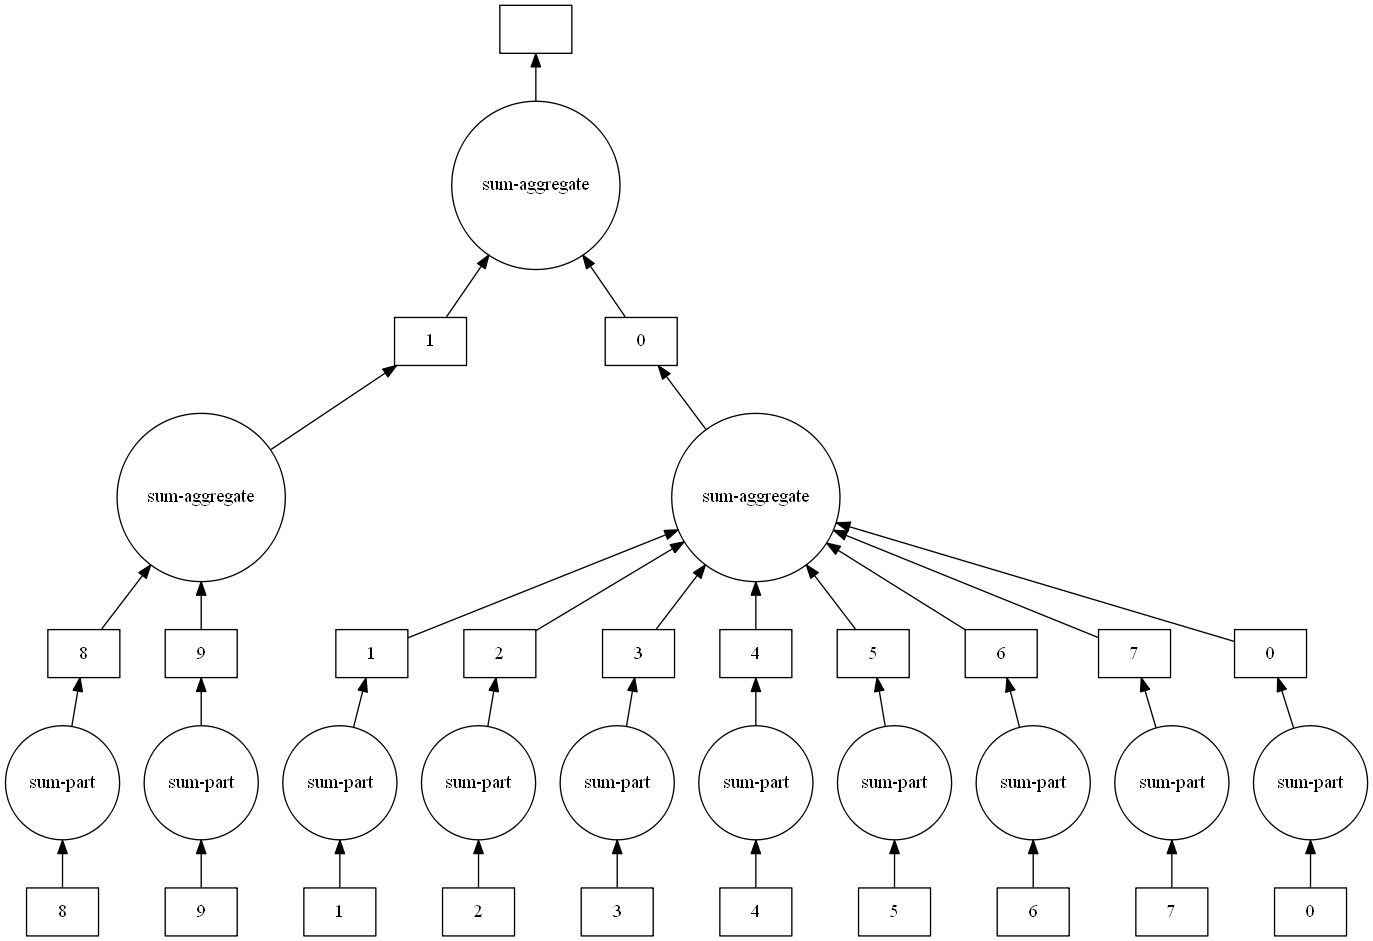

In [8]:
sumB.visualize()

In [9]:
sumB.compute()

55

In [10]:
bag = db.read_text('cookie_data.txt',
                 storage_options={'anon': True})

In [11]:
bag.take(3)

('{"Jane": "2"}\n', '{"Jane": "1"}\n', '{"Pete": "20"}\n')

In [68]:
import json
js = bag.map(json.loads)

In [69]:
js.take(3)

({'Jane': '2'}, {'Jane': '1'}, {'Pete': '20'})

In [72]:
b = js.map(lambda x: tuple(x.items())[0])
b.take(2)

(('Jane', '2'), ('Jane', '1'))

In [82]:
a = b.map(lambda x: (x[0], int(x[1])))
# another solution 
# a = b.map(lamda x : {k: int(v) for k,v in x.items()})

In [151]:
a.count().compute()

9

## i. How many unique people are represented in this bag?

In [153]:
a.groupby(lambda x: x[0]).count().compute()

5

##iv. Return only the rows where someone has more than 4 cookies

In [106]:
fourCookie= a.filter(lambda x: x[1] > 4).compute()

In [128]:
fourCookie

[('Pete', 20), ('Yuki', 5), ('Duncan', 6), ('Duncan', 5)]

##ii. Who has the most entries in the bag?

In [149]:
m= a.map(lambda x:(x[0], int(x[1]))).max()

In [147]:
m

('Yuki', 5)

##Return only the rows that describe 'Jane'